# E-commerce Sales Analysis using PySpark

# Imports


In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, substring

# Spark Session Setup


In [2]:
spark = SparkSession\
      .builder\
      .appName("Sales Analysis")\
      .getOrCreate()

24/04/26 18:36:03 WARN Utils: Your hostname, mahtab-lap resolves to a loopback address: 127.0.1.1; using 172.20.10.2 instead (on interface wlo1)
24/04/26 18:36:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/26 18:36:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/26 18:36:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Load Orders Data


In [3]:
# import oders 
orderFilePath = '../data/orders.csv'
order_df = spark.read.options(header='true', inferSchema='true').csv(orderFilePath)

In [4]:
# Number of records
order_df.count()

200000

In [5]:
# Schema
order_df.printSchema()

root
 |-- ID_Order: integer (nullable = true)
 |-- ID_Customer: integer (nullable = true)
 |-- ID_Item: integer (nullable = true)
 |-- DateTime_CartFinalize: timestamp (nullable = true)
 |-- Amount_Gross_Order: double (nullable = true)
 |-- city_name_fa: string (nullable = true)
 |-- Quantity_item: double (nullable = true)



In [6]:
# Check for duplicates
order_df.distinct().count()

200000

# Data Preprocessing



# Date DataFrame Creation


In [7]:
order_df.select(col("DateTime_CartFinalize")).show(10, truncate=False)

+---------------------+
|DateTime_CartFinalize|
+---------------------+
|2015-10-15 08:50:56  |
|2018-02-11 00:29:26  |
|2016-06-14 00:30:08  |
|2018-09-03 14:37:19  |
|2016-05-21 11:51:02  |
|2018-03-01 12:07:15  |
|2017-08-19 13:30:24  |
|2018-03-04 19:19:02  |
|2017-12-11 19:33:59  |
|2018-01-23 06:11:34  |
+---------------------+
only showing top 10 rows



In [8]:
# Version 1
date_df_v1 = order_df.withColumn("year",  substring("DateTime_CartFinalize", 1, 4))\
                  .withColumn("month", substring("DateTime_CartFinalize", 6, 2))\
                  .withColumn("day",   substring("DateTime_CartFinalize", 9, 2))\
                  .withColumn("date",  substring("DateTime_CartFinalize", 1, 10))\
                  .withColumn("time",  substring("DateTime_CartFinalize", 12, 8))\
                  .select(col("date"), col("time"), col("year"), col("month"), col("day"))

In [9]:
date_df_v1.show()

+----------+--------+----+-----+---+
|      date|    time|year|month|day|
+----------+--------+----+-----+---+
|2015-10-15|08:50:56|2015|   10| 15|
|2018-02-11|00:29:26|2018|   02| 11|
|2016-06-14|00:30:08|2016|   06| 14|
|2018-09-03|14:37:19|2018|   09| 03|
|2016-05-21|11:51:02|2016|   05| 21|
|2018-03-01|12:07:15|2018|   03| 01|
|2017-08-19|13:30:24|2017|   08| 19|
|2018-03-04|19:19:02|2018|   03| 04|
|2017-12-11|19:33:59|2017|   12| 11|
|2018-01-23|06:11:34|2018|   01| 23|
|2016-08-02|10:48:18|2016|   08| 02|
|2016-12-04|03:12:59|2016|   12| 04|
|2018-06-13|12:28:55|2018|   06| 13|
|2018-11-21|07:44:36|2018|   11| 21|
|2016-08-31|13:27:44|2016|   08| 31|
|2017-07-05|09:37:45|2017|   07| 05|
|2018-10-04|17:48:12|2018|   10| 04|
|2017-12-13|11:28:20|2017|   12| 13|
|2018-10-30|22:15:15|2018|   10| 30|
|2015-09-20|09:25:01|2015|   09| 20|
+----------+--------+----+-----+---+
only showing top 20 rows



In [10]:
# Version 2
from pyspark.sql.functions import col, year, month, dayofmonth, date_format

In [11]:
date_df_v2 = order_df.withColumn("date", date_format(col("DateTime_CartFinalize"), "yyyy-MM-dd"))\
                     .withColumn("time", date_format(col("DateTime_CartFinalize"), "HH:mm:ss"))\
                     .withColumn("year", year(col("DateTime_CartFinalize")))\
                     .withColumn("month", month(col("DateTime_CartFinalize")))\
                     .withColumn("day", dayofmonth(col("DateTime_CartFinalize")))\
                     .select("date", "time", "year", "month", "day")

In [12]:
date_df_v2.show()

+----------+--------+----+-----+---+
|      date|    time|year|month|day|
+----------+--------+----+-----+---+
|2015-10-15|08:50:56|2015|   10| 15|
|2018-02-11|00:29:26|2018|    2| 11|
|2016-06-14|00:30:08|2016|    6| 14|
|2018-09-03|14:37:19|2018|    9|  3|
|2016-05-21|11:51:02|2016|    5| 21|
|2018-03-01|12:07:15|2018|    3|  1|
|2017-08-19|13:30:24|2017|    8| 19|
|2018-03-04|19:19:02|2018|    3|  4|
|2017-12-11|19:33:59|2017|   12| 11|
|2018-01-23|06:11:34|2018|    1| 23|
|2016-08-02|10:48:18|2016|    8|  2|
|2016-12-04|03:12:59|2016|   12|  4|
|2018-06-13|12:28:55|2018|    6| 13|
|2018-11-21|07:44:36|2018|   11| 21|
|2016-08-31|13:27:44|2016|    8| 31|
|2017-07-05|09:37:45|2017|    7|  5|
|2018-10-04|17:48:12|2018|   10|  4|
|2017-12-13|11:28:20|2017|   12| 13|
|2018-10-30|22:15:15|2018|   10| 30|
|2015-09-20|09:25:01|2015|    9| 20|
+----------+--------+----+-----+---+
only showing top 20 rows



In [13]:
# Version 3
from pyspark.sql.functions import to_date, to_timestamp

date_df_v3 = order_df.withColumn("date", to_date(col("DateTime_CartFinalize"))) \
            .withColumn("time", to_timestamp(col("DateTime_CartFinalize"))) \
            .withColumn("year", year(col("DateTime_CartFinalize"))) \
            .withColumn("month", month(col("DateTime_CartFinalize"))) \
            .withColumn("day", dayofmonth(col("DateTime_CartFinalize"))) \
            .select("date", "time", "year", "month", "day")

date_df_v3.show()


+----------+-------------------+----+-----+---+
|      date|               time|year|month|day|
+----------+-------------------+----+-----+---+
|2015-10-15|2015-10-15 08:50:56|2015|   10| 15|
|2018-02-11|2018-02-11 00:29:26|2018|    2| 11|
|2016-06-14|2016-06-14 00:30:08|2016|    6| 14|
|2018-09-03|2018-09-03 14:37:19|2018|    9|  3|
|2016-05-21|2016-05-21 11:51:02|2016|    5| 21|
|2018-03-01|2018-03-01 12:07:15|2018|    3|  1|
|2017-08-19|2017-08-19 13:30:24|2017|    8| 19|
|2018-03-04|2018-03-04 19:19:02|2018|    3|  4|
|2017-12-11|2017-12-11 19:33:59|2017|   12| 11|
|2018-01-23|2018-01-23 06:11:34|2018|    1| 23|
|2016-08-02|2016-08-02 10:48:18|2016|    8|  2|
|2016-12-04|2016-12-04 03:12:59|2016|   12|  4|
|2018-06-13|2018-06-13 12:28:55|2018|    6| 13|
|2018-11-21|2018-11-21 07:44:36|2018|   11| 21|
|2016-08-31|2016-08-31 13:27:44|2016|    8| 31|
|2017-07-05|2017-07-05 09:37:45|2017|    7|  5|
|2018-10-04|2018-10-04 17:48:12|2018|   10|  4|
|2017-12-13|2017-12-13 11:28:20|2017|   

# Analysis


In [14]:
from pyspark.sql.functions import max, sum

In [15]:
max_year = date_df_v2.agg(max("year")).collect()[0][0]

In [16]:
max_year

2018

In [17]:
date_df_v2.select(col('year')).distinct().show()

+----+
|year|
+----+
|2018|
|2015|
|2013|
|2014|
|2016|
|2017|
+----+



In [18]:
order_df = order_df.withColumn("date", date_format(col("DateTime_CartFinalize"), "yyyy-MM-dd"))\
                     .withColumn("time", date_format(col("DateTime_CartFinalize"), "HH:mm:ss"))\
                     .withColumn("year", year(col("DateTime_CartFinalize")))\
                     .withColumn("month", month(col("DateTime_CartFinalize")))\
                     .withColumn("day", dayofmonth(col("DateTime_CartFinalize")))

In [19]:
order_df.printSchema()

root
 |-- ID_Order: integer (nullable = true)
 |-- ID_Customer: integer (nullable = true)
 |-- ID_Item: integer (nullable = true)
 |-- DateTime_CartFinalize: timestamp (nullable = true)
 |-- Amount_Gross_Order: double (nullable = true)
 |-- city_name_fa: string (nullable = true)
 |-- Quantity_item: double (nullable = true)
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)



# Total Sales Revenue and Quantity Sold


In [20]:
# find total sale amont per each year
order_df.groupBy("year").sum("Amount_Gross_Order").orderBy("year").show()

+----+-----------------------+
|year|sum(Amount_Gross_Order)|
+----+-----------------------+
|2013|          1.213148584E9|
|2014|        1.3289856116E10|
|2015|        3.2751238135E10|
|2016|        5.3899257903E10|
|2017|        8.6812584003E10|
|2018|       1.03674724022E11|
+----+-----------------------+



In [21]:
# find total amount of sold product in each year
order_df.groupBy("year").sum("Quantity_item").orderBy("year").show()

+----+------------------+
|year|sum(Quantity_item)|
+----+------------------+
|2013|             313.0|
|2014|            4605.0|
|2015|           22926.0|
|2016|           50548.0|
|2017|           78389.0|
|2018|           95464.0|
+----+------------------+



In [22]:
# find a day in each year with maximum amonut of saleing
order_df.groupBy("year", "date").sum("Amount_Gross_Order").orderBy("year", "date").show()

+----+----------+-----------------------+
|year|      date|sum(Amount_Gross_Order)|
+----+----------+-----------------------+
|2013|2013-09-27|            1.2831321E7|
|2013|2013-09-28|               926226.0|
|2013|2013-09-29|              9433585.0|
|2013|2013-09-30|              8786792.0|
|2013|2013-10-04|            4.0274717E7|
|2013|2013-10-05|            3.1039057E7|
|2013|2013-10-06|                75472.0|
|2013|2013-10-07|              7036226.0|
|2013|2013-10-08|            1.8896226E7|
|2013|2013-10-09|            6.7360566E7|
|2013|2013-10-10|              3419057.0|
|2013|2013-10-11|              2634340.0|
|2013|2013-10-12|            1.8137547E7|
|2013|2013-10-13|              9002830.0|
|2013|2013-10-14|            1.9861509E7|
|2013|2013-10-15|             1.120566E7|
|2013|2013-10-16|               122642.0|
|2013|2013-10-17|              4133019.0|
|2013|2013-10-18|               850189.0|
|2013|2013-10-19|              6940188.0|
+----+----------+-----------------

In [23]:
order_df.printSchema()

root
 |-- ID_Order: integer (nullable = true)
 |-- ID_Customer: integer (nullable = true)
 |-- ID_Item: integer (nullable = true)
 |-- DateTime_CartFinalize: timestamp (nullable = true)
 |-- Amount_Gross_Order: double (nullable = true)
 |-- city_name_fa: string (nullable = true)
 |-- Quantity_item: double (nullable = true)
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)



# Find the day in each year with maximum total sales

In [24]:
# find total sale each day in each year
daily_sales = order_df.groupBy("year", "date")\
                      .agg(sum("Amount_Gross_Order").alias("total_sales"))

In [25]:
daily_sales.show()

+----+----------+------------+
|year|      date| total_sales|
+----+----------+------------+
|2016|2016-10-30|1.94455409E8|
|2017|2017-01-14|2.55403018E8|
|2018|2018-04-17|3.62873893E8|
|2018|2018-08-18|2.69214592E8|
|2014|2014-10-30| 1.2061444E7|
|2016|2016-08-07|1.39915684E8|
|2015|2015-03-25|1.07598147E8|
|2015|2015-12-18| 6.6650826E7|
|2015|2015-06-19| 3.4049848E7|
|2014|2014-01-18| 1.3158114E7|
|2014|2014-06-28| 2.3234629E7|
|2018|2018-06-13|3.86119319E8|
|2018|2018-09-11|1.44493617E8|
|2016|2016-11-07|1.26193016E8|
|2015|2015-03-08|1.36026776E8|
|2018|2018-06-01|2.47343103E8|
|2015|2015-05-18| 9.7257477E7|
|2015|2015-05-14| 5.3223119E7|
|2013|2013-10-11|   2634340.0|
|2018|2018-03-01|3.22532434E8|
+----+----------+------------+
only showing top 20 rows



In [26]:
# find max total sale in each year
max_sales_per_year = daily_sales.groupBy("year")\
                                .agg(max("total_sales").alias("total_sales"))

In [27]:
max_sales_per_year.show()

+----+-------------+
|year|  total_sales|
+----+-------------+
|2018|1.190929935E9|
|2015| 3.37921223E8|
|2013|  6.9821132E7|
|2014| 1.21584444E8|
|2016| 5.56054445E8|
|2017|1.870801693E9|
+----+-------------+



In [28]:
# join two previous data frame to get the result
day_with_max_sales_per_year = max_sales_per_year.join(daily_sales, ["year", "total_sales"])\
                                                 .select("year", "date", "total_sales")

In [29]:
day_with_max_sales_per_year.show()

+----+----------+-------------+
|year|      date|  total_sales|
+----+----------+-------------+
|2018|2018-03-03|1.190929935E9|
|2015|2015-12-20| 3.37921223E8|
|2013|2013-11-25|  6.9821132E7|
|2014|2014-11-30| 1.21584444E8|
|2016|2016-12-20| 5.56054445E8|
|2017|2017-09-13|1.870801693E9|
+----+----------+-------------+



# How do sales vary by product , and what are the top-selling products?

In [30]:
# import oders 
productFilePath = '../data/product.csv'
product_df = spark.read.options(header='true', inferSchema='true').csv(productFilePath)

In [31]:
product_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- product_title_fa: string (nullable = true)
 |-- product_title_en: string (nullable = true)
 |-- url_code: string (nullable = true)
 |-- title_alt: string (nullable = true)
 |-- category_title_fa: string (nullable = true)
 |-- category_keywords: string (nullable = true)
 |-- brand_name_fa: string (nullable = true)
 |-- brand_name_en: string (nullable = true)
 |-- product_attributes: string (nullable = true)



In [32]:
orders_with_product_df = order_df.join(product_df, order_df["ID_Item"] == product_df["id"])\
                                 .select("Amount_Gross_Order", "Quantity_item",
                                         "date", "product_title_fa", "category_title_fa", "brand_name_fa")

In [33]:
orders_with_product_df.printSchema()

root
 |-- Amount_Gross_Order: double (nullable = true)
 |-- Quantity_item: double (nullable = true)
 |-- date: string (nullable = true)
 |-- product_title_fa: string (nullable = true)
 |-- category_title_fa: string (nullable = true)
 |-- brand_name_fa: string (nullable = true)



In [34]:
orders_with_product_df.count()

6900

In [35]:
# find amount of sales per product
products_total_sales = orders_with_product_df.groupBy("product_title_fa")\
                      .agg(sum("Amount_Gross_Order").alias("total_sales"))\
                      .orderBy("total_sales", ascending=False).select("product_title_fa", "total_sales")

In [36]:
# get a product with maximum sales
products_total_sales.first()



Row(product_title_fa='تابلو دیواری 9 تکه بارمان کد TA106', total_sales=121693580.0)

In [37]:
# get a product with minimum sales
products_total_sales.orderBy("total_sales").first()


Row(product_title_fa='تابلو فرش ماشینی شبیر کد QS20', total_sales=3.0)

In [38]:
orders_with_product_category_df = order_df.join(product_df, order_df["ID_Item"] == product_df["id"])\
                                 .select("Amount_Gross_Order", "Quantity_item",
                                         "date", "product_title_fa", "category_title_fa")

In [39]:
orders_with_product_category_df.printSchema()

root
 |-- Amount_Gross_Order: double (nullable = true)
 |-- Quantity_item: double (nullable = true)
 |-- date: string (nullable = true)
 |-- product_title_fa: string (nullable = true)
 |-- category_title_fa: string (nullable = true)



In [40]:
orders_with_product_category_df.groupBy("category_title_fa").agg(sum("Amount_Gross_Order").alias("total_sales"))\
                                                            .select("category_title_fa", "total_sales").show()

+--------------------+-----------+
|   category_title_fa|total_sales|
+--------------------+-----------+
|          فرش ماشینی|2.0571879E7|
|مانیتور و پیجر ات...|  1960000.0|
|            تلویزیون|   974000.0|
|           سایر ظروف|   550367.0|
|         چراغ تزئینی|3.1556269E7|
|  کابل صوتی و تصویری|  2279000.0|
|  قاشق، چنگال و کارد|    49541.0|
|          کیف و کوله|1.3500763E7|
|        عینک سه بعدی|  2950000.0|
|    پستانک و ملزومات|  4994138.0|
|         ست و نیم ست|2.7632224E7|
|    ست و نیم ست نقره|   313000.0|
|    ابزار شیرینی پزی|  3984591.0|
|       قمقمه و فلاسک|  2957459.0|
|              دستبند|6.8113113E7|
|تجهیزات جانبی ایر...| 1.380404E7|
|                 گبه|  8330000.0|
|ابزار ایمنی کودک ...|  2150000.0|
|    کیف و کوله مدرسه|9.5363073E7|
|آموزش نرم‌افزار و...|   265000.0|
+--------------------+-----------+
only showing top 20 rows



In [41]:
# find category with max sales
orders_with_product_category_df.groupBy("category_title_fa").agg(sum("Amount_Gross_Order").alias("total_sales"))\
                                                            .select("category_title_fa", "total_sales")\
                                                            .orderBy("total_sales", ascending=False).first()

Row(category_title_fa=None, total_sales=389516841.0)

In [42]:
# find category with min sales
orders_with_product_category_df.groupBy("category_title_fa").agg(sum("Amount_Gross_Order").alias("total_sales"))\
                                                            .select("category_title_fa", "total_sales")\
                                                            .orderBy("total_sales").first()

Row(category_title_fa='کهنه کودک و نوزاد', total_sales=4000.0)

# What are the sales trends over time

In [43]:
trade_trend_per_year_df = order_df.groupBy("year").agg(sum("Amount_Gross_Order").alias("total_sales"))\
                                                   .select("year", "total_sales")\
                                                   .orderBy('year')

In [44]:
trade_trend_per_year_df.show()

+----+----------------+
|year|     total_sales|
+----+----------------+
|2013|   1.213148584E9|
|2014| 1.3289856116E10|
|2015| 3.2751238135E10|
|2016| 5.3899257903E10|
|2017| 8.6812584003E10|
|2018|1.03674724022E11|
+----+----------------+



In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
trends_pd = trade_trend_per_year_df.toPandas()

In [47]:
trends_pd

,year,total_sales
0,2013,1.213149e+09
1,2014,1.328986e+10
2,2015,3.275124e+10
3,2016,5.389926e+10
4,2017,8.681258e+10
5,2018,1.036747e+11


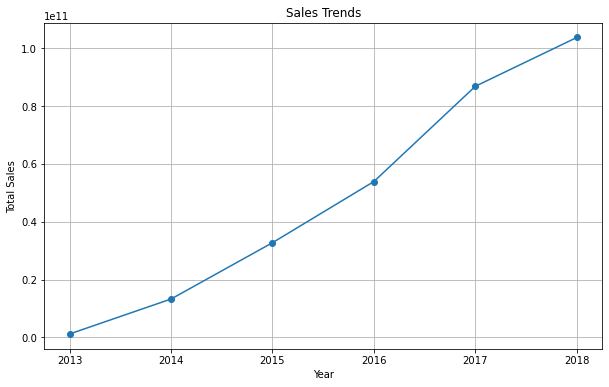

In [48]:
# Plot the sales trends
plt.figure(figsize=(10,6))
plt.plot(np.array(trends_pd["year"]), np.array(trends_pd["total_sales"]), marker='o')
plt.xlabel("Year") 
plt.ylabel("Total Sales")
plt.title("Sales Trends")
plt.grid(True)
plt.show()


In [49]:
trade_trend_per_month_for_specific_year = order_df.where(col("year")==2018)\
                                                  .groupBy("month")\
                                                  .agg(sum("Amount_Gross_Order").alias("total_sales"))\
                                                  .select("month", "total_sales")\
                                                  .orderBy("month")


In [50]:
trade_trend_per_month_for_specific_year.show()

+-----+---------------+
|month|    total_sales|
+-----+---------------+
|    1|  9.521618579E9|
|    2|1.1014640768E10|
|    3|1.2486512923E10|
|    4|1.0808548474E10|
|    5|1.1443512431E10|
|    6| 1.005451957E10|
|    7|  8.109363588E9|
|    8|  6.513780987E9|
|    9|  7.394628322E9|
|   10|  6.187311201E9|
|   11|  7.026060108E9|
|   12|  3.114227071E9|
+-----+---------------+



In [51]:
trends_pd = trade_trend_per_month_for_specific_year.toPandas()

In [52]:
trends_pd

,month,total_sales
0,1,9.521619e+09
1,2,1.101464e+10
2,3,1.248651e+10
3,4,1.080855e+10
4,5,1.144351e+10
5,6,1.005452e+10
6,7,8.109364e+09
7,8,6.513781e+09
8,9,7.394628e+09
9,10,6.187311e+09


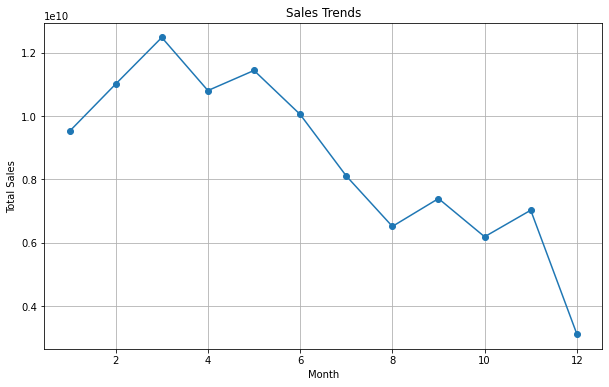

In [53]:
# Plot the sales trends per month
plt.figure(figsize=(10,6))
plt.plot(np.array(trends_pd["month"]), np.array(trends_pd["total_sales"]), marker='o')
plt.xlabel("Month") 
plt.ylabel("Total Sales")
plt.title("Sales Trends")
plt.grid(True)
plt.show()
